In [1]:
import pandas as pd  
import numpy as np  
import random as rd
import datetime
import statsmodels.tsa.api as smt 
from statsmodels.tsa.stattools import adfuller
import warnings
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
     |████████████████████████████████| 49 kB 2.2 MB/s 
     |████████████████████████████████| 178 kB 11.2 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641347 sha256=110e03cb6a92db71918c6d8a05746a8c05854131edc161500d3260b37dd72a0e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import fbprophet as Prophet

In [3]:
df=pd.read_csv("/content/google-data.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df.Date.min()

'2013-01-02'

In [7]:
df.Date.max()

'2017-12-29'

In [8]:
df['date']=pd.to_datetime(df["Date"]).dt.strftime("%d/%m/%y")

In [9]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,date
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,02/01/13
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,03/01/13


In [10]:
df.drop(columns=['Date'],inplace=True)

In [11]:
prices=pd.DataFrame()


In [12]:
prices['date']=pd.date_range(start='2013-01-02',end='2017-12-29')

In [13]:
prices['date']=prices['date'].dt.strftime("%d/%m/%y")
prices=prices.merge(df,how="left",on="date")

In [14]:
numeric=["Open","High","Low","Close","Adj Close","Volume"]

In [15]:
for i in numeric :
  prices[i]=prices[i].interpolate(method="cubic")

In [16]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1823 non-null   object 
 1   Open       1823 non-null   float64
 2   High       1823 non-null   float64
 3   Low        1823 non-null   float64
 4   Close      1823 non-null   float64
 5   Adj Close  1823 non-null   float64
 6   Volume     1823 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.9+ KB


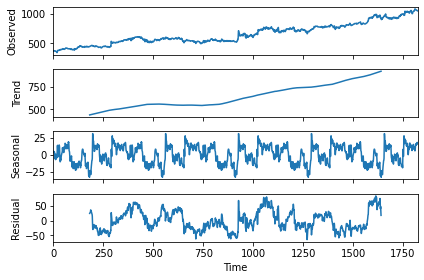

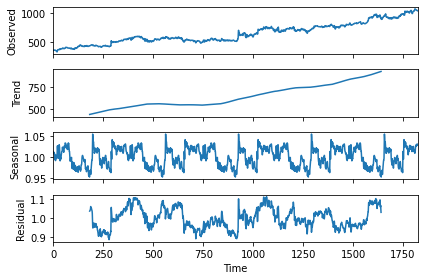

In [17]:
import statsmodels.api as sm
additive = sm.tsa.seasonal_decompose(prices.Close.values,freq=365,model="additive") 
figurel = additive.plot() 
multiplicative = sm.tsa.seasonal_decompose(prices.Close.values,freq=365,model="multiplicative") 
figure2 = multiplicative.plot() 


In [18]:
model_dataframe = prices.loc[:,['date', 'Close']].rename(columns={"date": "ds", "Close": "y"})
model_dataframe.head() 

,ds,y
0,02/01/13,359.288177
1,03/01/13,359.496826
2,04/01/13,366.600616
3,05/01/13,369.244832
4,06/01/13,367.666599


In [19]:
model=Prophet.Prophet(yearly_seasonality=True,interval_width=0.95)   # Niye 2 defe prophet yazdım ?
model.fit(model_dataframe)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future=model.make_future_dataframe(periods=100)
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
1921,2018-04-07,1080.980927,981.509352,1172.459483
1922,2018-04-08,1081.067296,992.431077,1170.078779


Text(0.5, 1.0, 'Case Study')

<Figure size 2160x864 with 0 Axes>

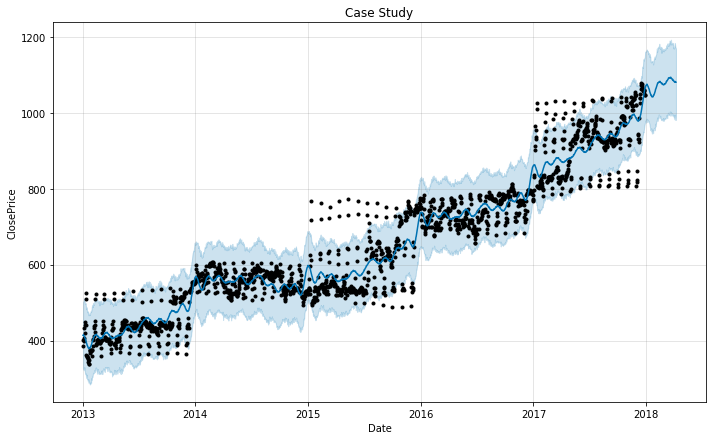

In [21]:
plt.figure(figsize=(30,12))
model.plot(forecast,xlabel='Date',ylabel='ClosePrice')
plt.title('Case Study')

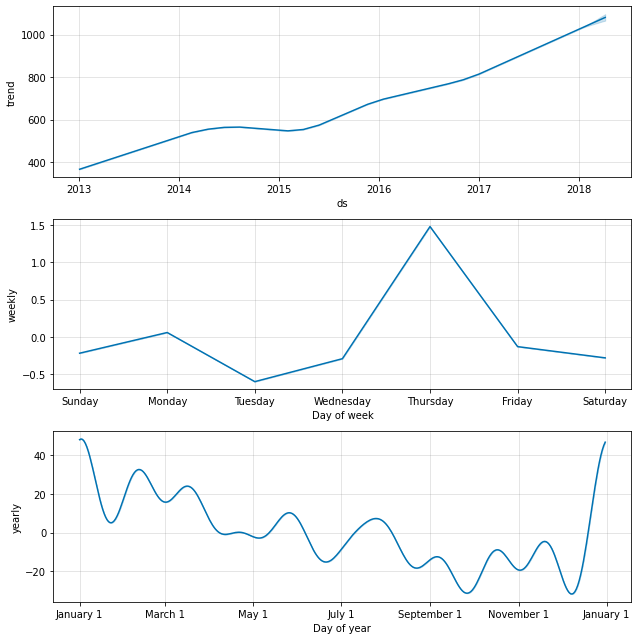

In [22]:
fig=model.plot_components(forecast)

In [23]:
from fbprophet.diagnostics import cross_validation 
from fbprophet.diagnostics import performance_metrics 
!pip install bayesian-optimization 

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=67ed196fd39e70d06098ace419d32fc678d91e357993059766c75b8e2ed1f4ec
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [24]:
def optimization_function(changepoint_prior_scale, seasonality_prior_scale):  
  model = Prophet.Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale) 
  df_cv = cross_validation(model, horizon='300 days', parallel="processes") 
  df_p = performance_metrics(df_cv, rolling_window=1) 
  rmse_score = (df_p['rmse'].values[0]) 
  print(rmse_score) 
  return -rmse_score


In [25]:
from bayes_opt import BayesianOptimization

In [32]:
prophet_params={ 
'changepoint_prior_scale': [0.001, 0.5], 
'seasonality_prior_scale': [0.01,10.01], 
} 
optimizer = BayesianOptimization( 
    f=optimization_function, 
    pbounds=prophet_params, 
    random_state=42, 
) 

In [ ]:
optimizer.maximize(init_points=2,n_iter=3,)

In [ ]:
optimizer.max

In [ ]:
optimizer.res